In [99]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth',-1)

## LOAD DATA

In [2]:
# Data Januari
data_jan=pd.read_excel('Peminjaman buku 2016.xls',sheetname='Jan',header=3)
data_jan=data_jan[3:]
data_jan=data_jan.reset_index(drop=True)
data_jan.head()

,No,Tanggal,ID Anggota,Nama Anggota,Prodi,ID Buku,Judul,Aktifitas,Tanggal Kembali,Keterangan
0,4.0,6-Jan-16,02.00283,Tulus P. Simanjuntak,NaN,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr,Borrow,20-Jan-16 17:06:08,NaN
1,5.0,18-Jan-16,02.00283,Tulus P. Simanjuntak,NaN,10.06667,RHCE: Red Hat Certified Engineer Linux: Study,Return,18-Jan-16 14:09:07,NaN
2,6.0,20-Jan-16,02.00283,Tulus P. Simanjuntak,NaN,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr,Return,20-Jan-16 17:06:08,NaN
3,7.0,26-Jan-16,02.00292,Edwin Swandi Sijabat,NaN,15.00050,Problem Solving and Program Design in C,Borrow,6-Apr-16 08:50:42,NaN
4,8.0,26-Jan-16,02.00292,Edwin Swandi Sijabat,NaN,14.00418,Teori Bahasa dan Otomata,Borrow,NaN,NaN


In [3]:
# Data Feb
data_feb=pd.read_excel('Peminjaman buku 2016.xls',sheetname='Feb',header=3)
data_feb=data_jan[3:]
data_feb=data_feb.reset_index(drop=True)
data_feb.head()

,No,Tanggal,ID Anggota,Nama Anggota,Prodi,ID Buku,Judul,Aktifitas,Tanggal Kembali,Keterangan
0,7.0,26-Jan-16,02.00292,Edwin Swandi Sijabat,NaN,15.00050,Problem Solving and Program Design in C,Borrow,6-Apr-16 08:50:42,NaN
1,8.0,26-Jan-16,02.00292,Edwin Swandi Sijabat,NaN,14.00418,Teori Bahasa dan Otomata,Borrow,NaN,NaN
2,9.0,6-Apr-16,02.00292,Edwin Swandi Sijabat,NaN,15.00050,Problem Solving and Program Design in C,Return,6-Apr-16 08:50:42,NaN
3,10.0,25-Jan-16,02.00293,Gerry Italiano Wowilling,NaN,03.03343,Cambridge Preparation for the TOEFL Test,Borrow,19-Feb-16 21:24:18,NaN
4,11.0,19-Feb-16,02.00293,Gerry Italiano Wowilling,NaN,03.03343,Cambridge Preparation for the TOEFL Test,Return,19-Feb-16 21:24:18,NaN


In [4]:
data_peminjaman=pd.concat([data_jan,data_feb])
print "jumlah data:\t", len(data_peminjaman)
data_peminjaman.head()

jumlah data:	1459


,No,Tanggal,ID Anggota,Nama Anggota,Prodi,ID Buku,Judul,Aktifitas,Tanggal Kembali,Keterangan
0,4.0,6-Jan-16,02.00283,Tulus P. Simanjuntak,NaN,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr,Borrow,20-Jan-16 17:06:08,NaN
1,5.0,18-Jan-16,02.00283,Tulus P. Simanjuntak,NaN,10.06667,RHCE: Red Hat Certified Engineer Linux: Study,Return,18-Jan-16 14:09:07,NaN
2,6.0,20-Jan-16,02.00283,Tulus P. Simanjuntak,NaN,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr,Return,20-Jan-16 17:06:08,NaN
3,7.0,26-Jan-16,02.00292,Edwin Swandi Sijabat,NaN,15.00050,Problem Solving and Program Design in C,Borrow,6-Apr-16 08:50:42,NaN
4,8.0,26-Jan-16,02.00292,Edwin Swandi Sijabat,NaN,14.00418,Teori Bahasa dan Otomata,Borrow,NaN,NaN


In [5]:
data_peminjaman_id=data_peminjaman[['ID Anggota','ID Buku','Judul']]
print "jumlah data:\t", len(data_peminjaman_id) 
data_peminjaman_id.head()

jumlah data:	1459


,ID Anggota,ID Buku,Judul
0,02.00283,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr
1,02.00283,10.06667,RHCE: Red Hat Certified Engineer Linux: Study
2,02.00283,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr
3,02.00292,15.00050,Problem Solving and Program Design in C
4,02.00292,14.00418,Teori Bahasa dan Otomata


### HILANGKAN NAN DAN DUPLIKAT

In [6]:
#hilangkan nan
#data_jan=data_jan.dropna(how='any').head(10)
data_peminjaman_id=data_peminjaman_id.dropna(how='any')
print "jumlah data:\t", len(data_peminjaman_id) 
data_peminjaman_id.head(10)

jumlah data:	1449


,ID Anggota,ID Buku,Judul
0,02.00283,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr
1,02.00283,10.06667,RHCE: Red Hat Certified Engineer Linux: Study
2,02.00283,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr
3,02.00292,15.00050,Problem Solving and Program Design in C
4,02.00292,14.00418,Teori Bahasa dan Otomata
5,02.00292,15.00050,Problem Solving and Program Design in C
6,02.00293,03.03343,Cambridge Preparation for the TOEFL Test
7,02.00293,03.03343,Cambridge Preparation for the TOEFL Test
8,02.00303,02.00766,Don't Sweat the small stuff in Love
9,02.00303,02.00766,Don't Sweat the small stuff in Love


In [7]:
#HILANGKAN DUPLIKAT
data_peminjaman_id=data_peminjaman_id.loc[~data_peminjaman_id.duplicated()==True]
print "jumlah data:\t", len(data_peminjaman_id) 
data_peminjaman_id.head(10)

jumlah data:	309


,ID Anggota,ID Buku,Judul
0,02.00283,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr
1,02.00283,10.06667,RHCE: Red Hat Certified Engineer Linux: Study
3,02.00292,15.00050,Problem Solving and Program Design in C
4,02.00292,14.00418,Teori Bahasa dan Otomata
6,02.00293,03.03343,Cambridge Preparation for the TOEFL Test
8,02.00303,02.00766,Don't Sweat the small stuff in Love
11,02.00304,15.5202.009020,"Supernova: Kesatria, Putri, & Bintang Jatuh"
12,02.00304,13.07412,Rectoverso
13,02.00304,15.5200.009018,Supernova: Petir
14,02.00304,14.00069,Filosofi Kopi: Kumpulan cerita dan prosa satu dekade


### DATA JIKA DIMASUKKAN ATRIBUT AKTIVITAS

Weighted Rating (WR) = (v/(v+m).R)+(m(v+m).C)

where,

- v is the number of votes for the movie
- m is the minimum votes required to be listed in the chart
- R is the average rating of the movie
- C is the mean vote across the whole report


In [10]:
data_peminjaman_aktivitas=data_peminjaman.copy()
data_peminjaman_aktivitas=data_peminjaman_aktivitas[['ID Anggota','ID Buku','Judul','Aktifitas']]
data_peminjaman_aktivitas=data_peminjaman_aktivitas.dropna(how='any')#drp na
event_type = {
   'Borrow': 1.0,#pinjam
   'Return': 0.0, #kembalikan
   'Renew': 2.0  
}

data_peminjaman_aktivitas['score'] = data_peminjaman_aktivitas['Aktifitas'].apply(lambda x: event_type[x])
print "jumlah data:\t", len(data_peminjaman_aktivitas) 
data_peminjaman_aktivitas.head(10)

jumlah data:	1449


,ID Anggota,ID Buku,Judul,Aktifitas,score
0,02.00283,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr,Borrow,1.0
1,02.00283,10.06667,RHCE: Red Hat Certified Engineer Linux: Study,Return,0.0
2,02.00283,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr,Return,0.0
3,02.00292,15.00050,Problem Solving and Program Design in C,Borrow,1.0
4,02.00292,14.00418,Teori Bahasa dan Otomata,Borrow,1.0
5,02.00292,15.00050,Problem Solving and Program Design in C,Return,0.0
6,02.00293,03.03343,Cambridge Preparation for the TOEFL Test,Borrow,1.0
7,02.00293,03.03343,Cambridge Preparation for the TOEFL Test,Return,0.0
8,02.00303,02.00766,Don't Sweat the small stuff in Love,Renew,2.0
9,02.00303,02.00766,Don't Sweat the small stuff in Love,Borrow,1.0


In [11]:
#Hilanngkan Duplikat
data_peminjaman_aktivitas=data_peminjaman_aktivitas.loc[
    ~data_peminjaman_aktivitas.duplicated(['ID Anggota','ID Buku'])==True]
data_peminjaman_aktivitas=data_peminjaman_aktivitas.reset_index(drop=True)
print "jumlah data:\t", len(data_peminjaman_aktivitas) 
data_peminjaman_aktivitas.head(10)

jumlah data:	309


,ID Anggota,ID Buku,Judul,Aktifitas,score
0,02.00283,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr,Borrow,1.0
1,02.00283,10.06667,RHCE: Red Hat Certified Engineer Linux: Study,Return,0.0
2,02.00292,15.00050,Problem Solving and Program Design in C,Borrow,1.0
3,02.00292,14.00418,Teori Bahasa dan Otomata,Borrow,1.0
4,02.00293,03.03343,Cambridge Preparation for the TOEFL Test,Borrow,1.0
5,02.00303,02.00766,Don't Sweat the small stuff in Love,Renew,2.0
6,02.00304,15.5202.009020,"Supernova: Kesatria, Putri, & Bintang Jatuh",Borrow,1.0
7,02.00304,13.07412,Rectoverso,Borrow,1.0
8,02.00304,15.5200.009018,Supernova: Petir,Borrow,1.0
9,02.00304,14.00069,Filosofi Kopi: Kumpulan cerita dan prosa satu dekade,Borrow,1.0


### POPULARITY

In [59]:
data_peminjaman_aktivitas.groupby('Judul')['score'].sum().sort_values(ascending=False).head()

Judul
Kalkulus Edisi Kesembilan Jilid 1                                49.0
Practice Exercises for the TOEFL                                 27.0
Metoda Statistika                                                16.0
Longman preparation course for the TOEFL test: The paper test    13.0
Ilmu peluang dan statistika untuk insinyur da                    13.0
Name: score, dtype: float64

In [82]:
buku_popular=data_peminjaman_aktivitas.groupby('Judul'
                    )['score'].sum().sort_values(ascending=False).reset_index()
buku_popular.rename(columns={"score": "score1"}).head()

,Judul,score1
0,Kalkulus Edisi Kesembilan Jilid 1,49.0
1,Practice Exercises for the TOEFL,27.0
2,Metoda Statistika,16.0
3,Longman preparation course for the TOEFL test: The paper test,13.0
4,Ilmu peluang dan statistika untuk insinyur da,13.0


In [74]:
buku_popular['Judul'].head()

0    Kalkulus Edisi Kesembilan Jilid 1                            
1    Practice Exercises for the TOEFL                             
2    Metoda Statistika                                            
3    Longman preparation course for the TOEFL test: The paper test
4    Ilmu peluang dan statistika untuk insinyur da                
Name: Judul, dtype: object

karena ada ID buku berbeda teteapi judul sama, maka lebih baik di groupkan berdasarkan Judul

Bandingkan hasil berikut

In [90]:
data_y=data_peminjaman_aktivitas.copy()
data_y.head()
#tambahkan kondisi

,ID Anggota,ID Buku,Judul,Aktifitas,score
0,02.00283,03.01737,Sistem Operasi : bagian-bagian dan prinsip-pr,Borrow,1.0
1,02.00283,10.06667,RHCE: Red Hat Certified Engineer Linux: Study,Return,0.0
2,02.00292,15.00050,Problem Solving and Program Design in C,Borrow,1.0
3,02.00292,14.00418,Teori Bahasa dan Otomata,Borrow,1.0
4,02.00293,03.03343,Cambridge Preparation for the TOEFL Test,Borrow,1.0


In [92]:
data_y.groupby(['ID Buku'])['score'].sum().sort_values(ascending=False).head(10)

ID Buku
15.4966.008784    3.0
12.07111          2.0
15.00076          2.0
11.06976          2.0
14.00466          2.0
14.00467          2.0
15.00079          2.0
07.06135          2.0
15.00395          2.0
14.00470          2.0
Name: score, dtype: float64

In [93]:
data_y[data_y['Judul']=='Kalkulus Edisi Kesembilan Jilid 1'].head(10)


,ID Anggota,ID Buku,Judul,Aktifitas,score
121,12S15008,15.00108,Kalkulus Edisi Kesembilan Jilid 1,Renew,2.0
123,12S15018,15.00110,Kalkulus Edisi Kesembilan Jilid 1,Borrow,1.0
124,12S15020,14.00479,Kalkulus Edisi Kesembilan Jilid 1,Borrow,1.0
125,12S15026,15.00113,Kalkulus Edisi Kesembilan Jilid 1,Renew,2.0
126,12S15027,14.00463,Kalkulus Edisi Kesembilan Jilid 1,Borrow,1.0
127,12S15028,14.00472,Kalkulus Edisi Kesembilan Jilid 1,Borrow,1.0
128,12S15031,14.00466,Kalkulus Edisi Kesembilan Jilid 1,Renew,2.0
129,12S15035,14.00473,Kalkulus Edisi Kesembilan Jilid 1,Renew,2.0
130,12S15037,14.00465,Kalkulus Edisi Kesembilan Jilid 1,Borrow,1.0
132,12S15042,14.00470,Kalkulus Edisi Kesembilan Jilid 1,Renew,2.0


In [135]:
import seaborn as sns


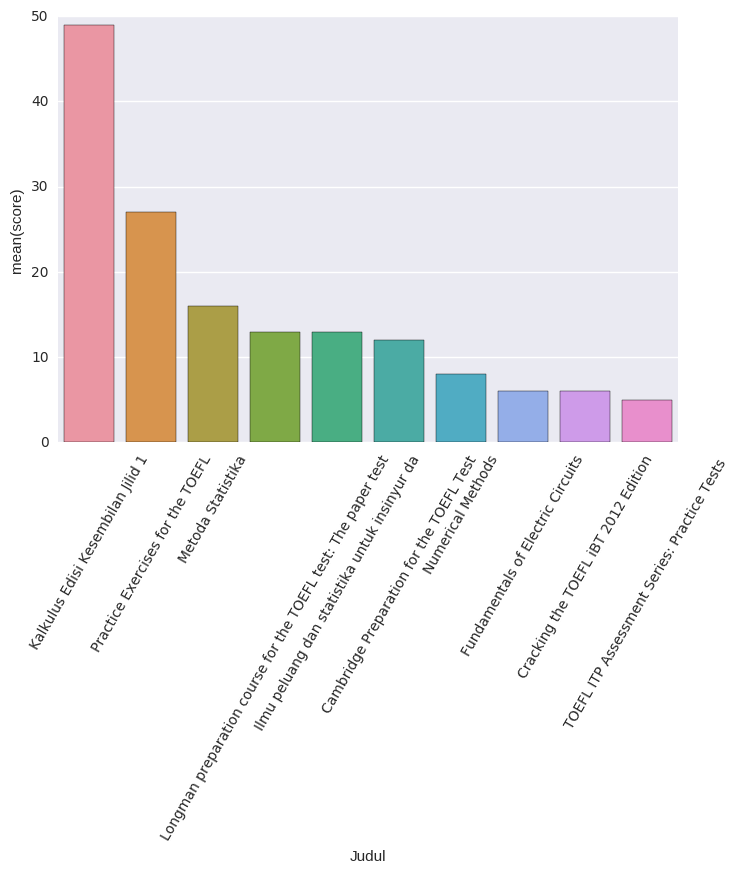

In [136]:
df2=buku_popular.copy()
#df2.iloc[5].plot(kind='bar')

g = sns.barplot(data=df2.head(10),x='Judul',y='score')
g.set_xticklabels(g.get_xticklabels(),rotation=60)
#g.map(sns.distplot, "Judul")
sns.plt.show()

### PROSES COLLOBORATIVE FILTERING